In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


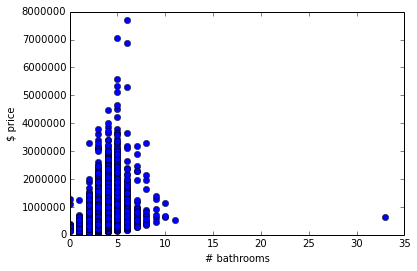

In [5]:
x = df['bedrooms'].as_matrix()
y = df['price'].as_matrix()

plt.plot(x, y, 'o')
plt.xlabel('# bathrooms')
plt.ylabel('$ price')
plt.show()

In [6]:
# Data normalization

# price = k_df['price']
bedrooms = df['bedrooms']
bathrooms = df['bathrooms']
sqft_living = df['sqft_living']
sqft_lot = df['sqft_lot']

# k_df['price'] = price / np.mean(price)
df['bedrooms'] = bedrooms / np.mean(bedrooms)
df['bathrooms'] = bathrooms / np.mean(bathrooms)
df['sqft_living'] = sqft_living / np.mean(sqft_living)
df['sqft_lot'] = sqft_lot / np.mean(sqft_lot)

In [7]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']].as_matrix()
y = df['price'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [8]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
linear_predictions = linreg.predict(X_test)
linear_error= mae(y_test, linear_predictions)
linear_error

174751.6020822071

# Ridge and Lasso Regressions

In [9]:
clf = Ridge()
clf.fit(X_train, y_train) 
ridge_predictions = clf.predict(X_test)
ridge_error = mae(y_test, ridge_predictions)
ridge_error

174738.50480362162

In [10]:
clf = Lasso()
clf.fit(X_train, y_train)
lasso_predictions = clf.predict(X_test)
lasso_error = mae(y_test, lasso_predictions)
lasso_error

174751.32936484116

# PCA

In [11]:
pca_lin_error = 1e+7
num_components = 0
for i in range(1, 4):
    pca = PCA(n_components=i)
    
    PCA_X_train = pca.fit_transform(X_train)
    PCA_X_test = pca.fit_transform(X_test)

    linreg = LinearRegression()

    linreg.fit(PCA_X_train, y_train)
    linear_predictions = linreg.predict(PCA_X_test)
    linear_error= mae(y_test, linear_predictions)
    
    if pca_lin_error > linear_error:
        num_components = i
        pca_lin_error = linear_error
        
    
print pca_lin_error
print num_components


186833.3029810249
3


# Simple Neural Net

In [12]:
k_df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]

In [13]:
k_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,221900.0,0.889985,0.472867,0.567335,0.374000
1,538000.0,0.889985,1.063952,1.235636,0.479381
2,180000.0,0.593324,0.472867,0.370210,0.661946
3,604000.0,1.186647,1.418602,0.942353,0.330973
4,510000.0,0.889985,0.945735,0.807731,0.534853


In [14]:
# price = k_df['price']
bedrooms = k_df['bedrooms']
bathrooms = k_df['bathrooms']
sqft_living = k_df['sqft_living']
sqft_lot = k_df['sqft_lot']

# k_df['price'] = price / np.mean(price)
k_df['bedrooms'] = bedrooms / np.mean(bedrooms)
k_df['bathrooms'] = bathrooms / np.mean(bathrooms)
k_df['sqft_living'] = sqft_living / np.mean(sqft_living)
k_df['sqft_lot'] = sqft_lot / np.mean(sqft_lot)

In [15]:
k_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,221900.0,0.889985,0.472867,0.567335,0.374000
1,538000.0,0.889985,1.063952,1.235636,0.479381
2,180000.0,0.593324,0.472867,0.370210,0.661946
3,604000.0,1.186647,1.418602,0.942353,0.330973
4,510000.0,0.889985,0.945735,0.807731,0.534853


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [24]:
model = Sequential()
model.add(Dense(32, input_shape=(4, )))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                160       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
__________

In [25]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [26]:
hist = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=64, 
        verbose=2, 
        validation_split=0.2)

Train on 13832 samples, validate on 3458 samples
Epoch 1/100
 - 1s - loss: 531111.4288 - acc: 0.0000e+00 - val_loss: 481721.7405 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 291009.3880 - acc: 0.0000e+00 - val_loss: 199107.6087 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 215231.8642 - acc: 0.0000e+00 - val_loss: 188838.2667 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 205910.9424 - acc: 0.0000e+00 - val_loss: 181617.2533 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 202785.9390 - acc: 0.0000e+00 - val_loss: 178504.0624 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 200504.6405 - acc: 0.0000e+00 - val_loss: 177192.0146 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 199897.4043 - acc: 0.0000e+00 - val_loss: 175957.1087 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 198507.3107 - acc: 0.0000e+00 - val_loss: 175812.9284 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 198233.7434 - acc: 7.2296e-05 - val_loss: 173895.1542 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 197347

Epoch 81/100
 - 1s - loss: 185982.8369 - acc: 0.0000e+00 - val_loss: 161381.7165 - val_acc: 0.0000e+00
Epoch 82/100
 - 1s - loss: 185817.4526 - acc: 0.0000e+00 - val_loss: 161166.2787 - val_acc: 0.0000e+00
Epoch 83/100
 - 0s - loss: 186648.8584 - acc: 0.0000e+00 - val_loss: 161011.1587 - val_acc: 0.0000e+00
Epoch 84/100
 - 0s - loss: 186558.4359 - acc: 0.0000e+00 - val_loss: 161167.5889 - val_acc: 0.0000e+00
Epoch 85/100
 - 1s - loss: 184628.3469 - acc: 0.0000e+00 - val_loss: 160779.2018 - val_acc: 0.0000e+00
Epoch 86/100
 - 1s - loss: 187156.3591 - acc: 0.0000e+00 - val_loss: 160699.2948 - val_acc: 0.0000e+00
Epoch 87/100
 - 0s - loss: 186149.6683 - acc: 0.0000e+00 - val_loss: 160955.8129 - val_acc: 0.0000e+00
Epoch 88/100
 - 0s - loss: 186827.8853 - acc: 0.0000e+00 - val_loss: 161350.7134 - val_acc: 0.0000e+00
Epoch 89/100
 - 0s - loss: 185099.4851 - acc: 0.0000e+00 - val_loss: 161881.4261 - val_acc: 0.0000e+00
Epoch 90/100
 - 0s - loss: 186611.4849 - acc: 0.0000e+00 - val_loss: 1608

In [27]:
predictions = model.predict(X_test)

In [28]:
keras_error = mae(y_test, predictions)

In [29]:
keras_error

167386.13526486236

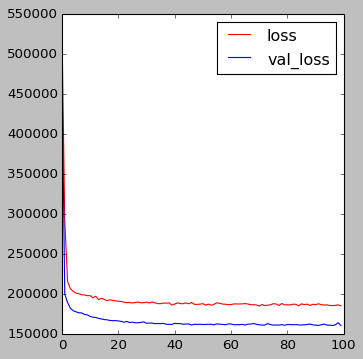

In [68]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(hist.history['loss'], color='r')
ax1.plot(hist.history['val_loss'], color='b')
ax1.legend(['loss', 'val_loss'])
plt.show()

# Graph Errors

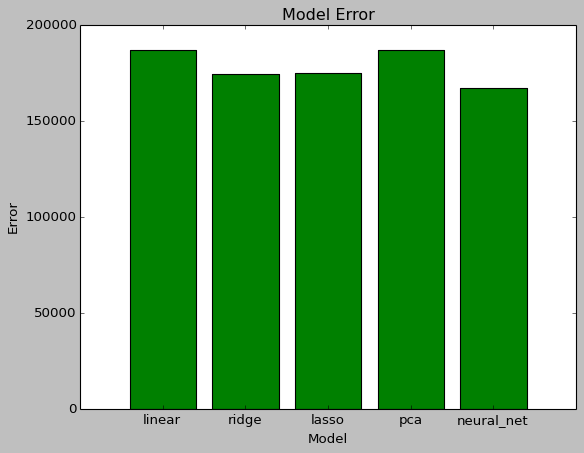

In [61]:
plt.rcdefaults()
fig, ax = plt.subplots()

error_names = ['linear', 'ridge', 'lasso', 'pca', 'neural_net']
y_pos = np.arange(len(error_names))
errors = [linear_error, ridge_error, lasso_error, pca_lin_error, keras_error]
ax.bar(y_pos, errors, color='green',align='center')
plt.xticks(y_pos, error_names)
ax.set_xticks(y_pos)
ax.set_ylabel('Error')
ax.set_xlabel('Model')
ax.set_title('Model Error')
plt.show()